In [1]:
%load_ext autoreload
%autoreload 2

import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams['mathtext.default'] = 'regular'
cmap = mpl.colormaps['plasma']

In [2]:
sheet_names = ['V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3']
sheet_names_formatted = {
    'V1_Exc_L4': "Layer 4 Exc.",
    'V1_Inh_L4': "Layer 4 Inh.",
    'V1_Exc_L2/3': "Layer 2/3 Exc.",
    'V1_Inh_L2/3': "Layer 2/3 Inh.",
}

In [3]:
class CellRate():

    def __init__(self, prefered_orientation=None):
        self.prefered_orientation = prefered_orientation
        self.gratings_rates = []
        self.gratings_orientations = []
        self.gratings_radius = []
        self.spont_rate = []

    @property
    def grating_orientation_relative(self):
        _rel_orient = []
        for go in self.gratings_orientations:
            _diff = go - self.prefered_orientation
            if _diff < - (numpy.pi / 2):
                _diff += numpy.pi
            if _diff > numpy.pi / 2:
                _diff -= numpy.pi
            _rel_orient.append(_diff)
        return _rel_orient

    def get_mean_rate_for_radius(self, target_radius):
        if not cell.spont_rate:
            return numpy.nan

        _rates = []
        for radius, rate in zip(self.gratings_radius, self.gratings_rates):
            if numpy.isclose(radius, target_radius, atol=0.05):
                _rates.append(rate)# / self.spont_rate)

        return numpy.nanmean(_rates)

# Spontaneous

In [4]:
run_id = "20250121-132347"
for sheet_name in sheet_names:
    datastore_to_pickle(run_id, sheet_name)
data_store = get_data_stores(run_id)[0]

Reading folder ./20250121-132347[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b
Pickling 20250121-132347, sheet V1_Exc_L4
1 / 41 , 2 / 41 , 3 / 41 , 4 / 41 , 5 / 41 , 6 / 41 , 7 / 41 , 8 / 41 , 9 / 41 , 10 / 41 , 11 / 41 , 12 / 41 , 13 / 41 , 14 / 41 , 15 / 41 , 16 / 41 , 17 / 41 , 18 / 41 , 19 / 41 , 20 / 41 , 21 / 41 , 22 / 41 , 23 / 41 , 24 / 41 , 25 / 41 , 26 / 41 , 27 / 41 , 28 / 41 , 29 / 41 , 30 / 41 , 31 / 41 , 32 / 41 , 33 / 41 , 34 / 41 , 35 / 41 , 36 / 41 , 37 / 41 , 38 / 41 , 39 / 41 , 40 / 41 , 
Took 237.3864758014679s for 41 segments
Reading folder ./20250121-132347[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b
Pickling 20250121-132347, sheet V1_Inh_L4
1 / 41 , 2 / 41 , 3 / 41 , 4 / 41 , 5 / 41 , 6 / 41 , 7 / 41 , 8 / 41 , 9 / 41 , 10 / 41 , 11 / 41 , 12 / 41 , 13 / 41 , 14 / 41 , 1

In [5]:
# Get the spont activity
data_per_sheet = {}
for sheet_name in sheet_names:
    data = read_pickled_datastore(run_id, sheet_name)
    data_per_sheet[sheet_name] = next(seg for seg in data if 'orientation' not in seg.annotation)

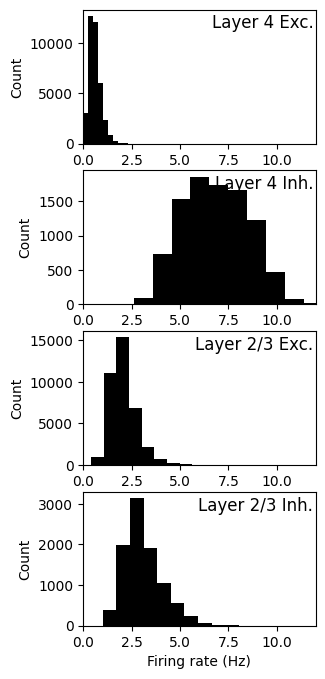

In [6]:
# SANITY TEST:
tolerance = 0.1 # rad
fig, axs = plt.subplots(4, figsize=(3, 8))
for idx_ax, sheet_name in enumerate(sheet_names):
    spont_seg = data_per_sheet[sheet_name]
    axs[idx_ax].hist([1000. * len(st) / spont_seg.duration for st in spont_seg.spiketrains], color="black")
    axs[idx_ax].set_ylabel("Count")
    axs[idx_ax].set_xlim(0, 12)
    axs[idx_ax].set_title(sheet_names_formatted[sheet_name], x=0.99, y=0.80, ha='right') 
axs[-1].set_xlabel("Firing rate (Hz)")
plt.show()

/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tanguy.damart/virt_env/mozaik/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


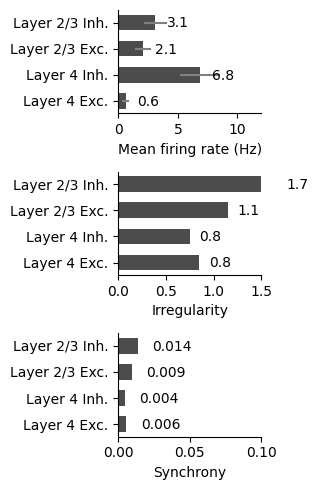

In [7]:
fig, axs = plt.subplots(3, figsize=(3.5, 5))

# Plot the spont activity rate/CC/CV with error bar
for ypos, (sheet_name, seg) in enumerate(data_per_sheet.items()):
    mean_rate = float(seg.mean_rate)
    std_rate = float(numpy.std([1000. * len(s) / seg.duration for s in seg.spiketrains]))
    axs[0].barh(ypos, mean_rate, height=0.6, color="black", alpha=0.7)
    axs[0].errorbar(mean_rate, ypos, xerr=float(std_rate), color="gray")
    axs[0].text(mean_rate + 1, ypos - 0.19, f"{mean_rate:.1f}")

axs[0].set_xlim(0, 12)
axs[0].set_xlabel("Mean firing rate (Hz)")

# Plot the Irregularity (CV)
for ypos, (sheet_name, seg) in enumerate(data_per_sheet.items()):
    isis = [numpy.diff(st) for st in seg.spiketrains]
    idxs = numpy.array([len(isi) for isi in isis]) > 5
    cvs = numpy.array([numpy.std(isi) / numpy.mean(isi) for isi in isis])[idxs]
    cv_mean = float(numpy.mean(cvs))
    cv_std = float(numpy.std(cvs))
    axs[1].barh(ypos, cv_mean, height=0.6, color="black", alpha=0.7)
    axs[1].errorbar(mean_rate, ypos, xerr=cv_std, color="gray")
    axs[1].text(cv_mean + 0.1, ypos - 0.19, f"{cv_mean:.1f}")

axs[1].set_xlim(0, 1.5)
axs[1].set_xlabel("Irregularity")

# Plot the Synchrony (CV)
for ypos, (sheet_name, seg) in enumerate(data_per_sheet.items()):
    spiketrains = seg.spiketrains[:2000]
    isis = [numpy.diff(st) for st in spiketrains]
    idxs = numpy.array([len(isi) for isi in isis]) > 5
    num_bins = int(seg.duration / 10.)
    r = (float(round(seg.t_start, 5)), float(round(seg.t_stop, 5)))
    psths = [numpy.histogram(x, bins=num_bins, range=r)[0] for x in spiketrains]
    corrs = numpy.nan_to_num(numpy.corrcoef(numpy.squeeze(psths)))
    ccs = corrs[idxs, :][:, idxs][numpy.triu_indices(sum(idxs == True), 1)]
    cc_mean = float(numpy.mean(ccs))
    cc_std = float(numpy.std(ccs))
    axs[2].barh(ypos, cc_mean, height=0.6, color="black", alpha=0.7)
    axs[2].errorbar(mean_rate, ypos, xerr=cc_std, color="gray")
    axs[2].text(cc_mean + 0.01, ypos - 0.19, f"{cc_mean:.3f}")

axs[2].set_xlim(0, 0.1)
axs[2].set_xlabel("Synchrony")

for ax in axs:
    ax.set_yticks(list(range(len(data_per_sheet))))
    ax.set_yticklabels([sheet_names_formatted[n] for n in data_per_sheet.keys()])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Orientation tuning

In [8]:
run_id = "20250121-132347"
for sheet_name in sheet_names:
    datastore_to_pickle(run_id, sheet_name)

Did not pickle 20250121-132347 because it has already been pickled
Did not pickle 20250121-132347 because it has already been pickled
Did not pickle 20250121-132347 because it has already been pickled
Did not pickle 20250121-132347 because it has already been pickled


In [9]:
# Get the OT activity
data_per_sheet = {}
data_spont_per_sheet = {}
data_store = get_data_stores(run_id)[0]
for sheet_name in sheet_names:
    data = read_pickled_datastore(run_id, sheet_name)
    data_per_sheet[sheet_name] = [seg for seg in data if 'orientation' in seg.annotation]
    data_spont_per_sheet[sheet_name] = next(seg for seg in data if 'orientation' not in seg.annotation)

Reading folder ./20250121-132347[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b


NeuronAnnotationsToPerNeuronValues analysis took: 0.6369051933288574 seconds


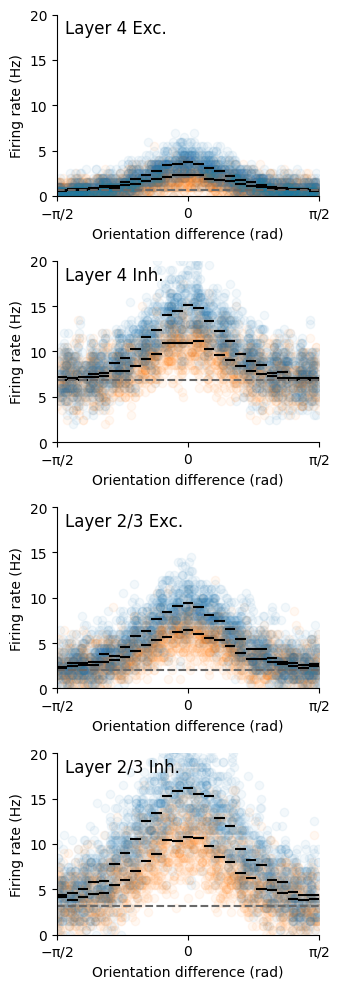

In [10]:
from scipy import stats

fig, axs = plt.subplots(4, figsize=(3.5, 10))

for idx_plot, sheet_name in enumerate(sheet_names):
    for contrast in [10, 100]:

        orientations_cells = get_orientation_preference(data_store, sheet_name).values
        cells = [CellRate(oc) for oc in orientations_cells]

        # Get the gratings fire rate
        for seg in data_per_sheet[sheet_name]:
            if seg.annotation["contrast"] == contrast:
                for idx, st in enumerate(seg.spiketrains):
                    cells[idx].gratings_rates.append(1000. * len(st) / seg.duration)
                    cells[idx].gratings_orientations.append(seg.annotation["orientation"])

        color = "C0" if contrast == 100 else "C1"
        for cell in cells[:100]:
            axs[idx_plot].scatter(cell.grating_orientation_relative, cell.gratings_rates, color=color, alpha=0.05)

        # Binning
        x = []
        y = []
        for cell in cells[:200]:
            x += cell.grating_orientation_relative
            y += cell.gratings_rates
        bin_means, bin_edges, binnumber = stats.binned_statistic(x, y, statistic='mean', bins=25, range=(-numpy.pi / 2, numpy.pi / 2))
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2
        axs[idx_plot].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='black', lw=1.5)
        axs[idx_plot].set_title(sheet_names_formatted[sheet_name], x=0.03, y=0.85, ha='left') 

    # Spontaneous rate
    axs[idx_plot].axhline(data_spont_per_sheet[sheet_name].mean_rate, color='dimgray', lw=1.5, ls='--')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-numpy.pi / 2, numpy.pi / 2)
    ax.set_ylim(0, 20)
    ax.set_ylabel("Firing rate (Hz)")
    ax.set_xlabel("Orientation difference (rad)")
    ax.set_xticks([-numpy.pi / 2, 0, numpy.pi / 2])
    ax.set_xticklabels([r'$-\pi /2$', '0', r'$\pi /2$'])

plt.tight_layout()
plt.show()

# Size tuning

In [11]:
run_id = "20250121-132417"
tolerance = 0.1  # rad
contrast = 100

for sheet_name in ['V1_Exc_L4', 'V1_Inh_L4', 'V1_Exc_L2/3', 'V1_Inh_L2/3']:
    datastore_to_pickle(run_id, sheet_name)

Reading folder ./20250121-132417[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b
Pickling 20250121-132417, sheet V1_Exc_L4
0 / 49 , 1 / 49 , 2 / 49 , 3 / 49 , 4 / 49 , 5 / 49 , 6 / 49 , 7 / 49 , 8 / 49 , 9 / 49 , 10 / 49 , 11 / 49 , 12 / 49 , 13 / 49 , 14 / 49 , 15 / 49 , 16 / 49 , 17 / 49 , 18 / 49 , 19 / 49 , 20 / 49 , 21 / 49 , 22 / 49 , 23 / 49 , 24 / 49 , 25 / 49 , 26 / 49 , 27 / 49 , 28 / 49 , 29 / 49 , 30 / 49 , 31 / 49 , 32 / 49 , 33 / 49 , 34 / 49 , 35 / 49 , 36 / 49 , 37 / 49 , 38 / 49 , 39 / 49 , 40 / 49 , 41 / 49 , 42 / 49 , 43 / 49 , 44 / 49 , 45 / 49 , 46 / 49 , 47 / 49 , 48 / 49 , 
Took 297.6725347042084s for 49 segments
Reading folder ./20250121-132417[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b
Pickling 20250121-132417, sheet V1_Inh_L4
1 / 49 , 2 / 49 , 3 / 49 , 4 / 49 , 5 / 49 

In [12]:
# Get the ST activity
data_per_sheet = {}
data_spont_per_sheet = {}
data_store = get_data_stores(run_id)[0]
for sheet_name in sheet_names:
    data = read_pickled_datastore(run_id, sheet_name)
    data_per_sheet[sheet_name] = [seg for seg in data if 'orientation' in seg.annotation]
    data_spont_per_sheet[sheet_name] = next(seg for seg in data if 'orientation' not in seg.annotation)

Reading folder ./20250121-132417[param.defaults]CombinationParamSearch{25}/SelfSustainedPushPull_ParameterSearch_____pynn_seed:1_base_weight:2.543e-05_base_weight:0.00014197_b


In [21]:
# Size tuning based on fitting with sum of gaussians
from scipy.optimize import differential_evolution
from scipy.special import erf


def sum_of_gaussian(p, x):
        return (p[0] * erf(x / p[1])**2
                - p[2] * erf(x / (p[1] + p[3]))**2
                + p[4] * erf(x / (p[1] + p[3] + p[5]))**2
                + p[6])


def error_function_evo(p, *args):
    x, y = args
    return numpy.linalg.norm(sum_of_gaussian(p, x) - y)


sheet_name = sheet_names[2]

spont_segment = data_spont_per_sheet[sheet_name]
grating_segments = data_per_sheet[sheet_name]

gratings_orientations = set([seg.annotation['orientation'] for seg in grating_segments if 'orientation' in seg.annotation])
orientations_cells = get_orientation_preference(data_store, sheet_name).values

cells = [CellRate(oc) for oc in orientations_cells]
for idx, st in enumerate(spont_segment.spiketrains):
    cells[idx].spont_rate = 1000. * len(st) / spont_segment.duration

# Get the gratings fire rate
for orientation in gratings_orientations:
    for seg in grating_segments:
        if 'contrast' in seg.annotation and seg.annotation["contrast"] == contrast:
            for idx, st in enumerate(seg.spiketrains):
                if numpy.isclose(cells[idx].prefered_orientation, seg.annotation["orientation"], atol=tolerance):
                    cells[idx].gratings_rates.append(1000. * len(st) / seg.duration)
                    cells[idx].gratings_orientations.append(seg.annotation["orientation"])
                    cells[idx].gratings_radius.append(seg.annotation["radius"])

cells = [c for c in cells if len(c.gratings_rates)]
radiuses = sorted(list(set([seg.annotation["radius"] for seg in grating_segments if 'radius' in seg.annotation])))

crf_sizes = []
supp_sizes = []
sis = []
max_responses = []
csis = []
errs = []

for idx_cell, cell in enumerate(cells):

    print(idx_cell, len(cells))

    values = [cell.get_mean_rate_for_radius(radius) for radius in radiuses]
    rads = list(radiuses)

    rads, values = zip(*sorted(zip(rads,values)))
    rads = numpy.array(rads)
    values = numpy.array(values)

    res = differential_evolution(
        error_function_evo,
        bounds=[(0, 60), (0, 20), (0, 60), (0, 15), (0, 15), (0, 25), (0, 5)],
        args=(rads, values),
        strategy='rand2bin',
        maxiter=10000,
        popsize=30,
        tol=0.1,
        mutation=(0.5, 1.5),
        recombination=0.95,
        workers=1,
    )
    #print(f"Residual loss evo: {error_function_evo(res.x, *(rads, values))}")
    errs.append(error_function_evo(res.x, *(rads, values)))

    X_fit = numpy.linspace(0, 5, 100)
    values_fit = sum_of_gaussian(res.x, X_fit)

    if False:
        fig, ax = plt.subplots(1, figsize=(3, 2))
        ax.scatter(rads, values, color="black")
        ax.plot(X_fit, values_fit)
        plt.show()

    max_response = numpy.max(values_fit)
    crf_index  = numpy.argmax(values_fit)
    crf_size = X_fit[crf_index]

    if crf_index < len(values_fit)-1:
        supp_index = crf_index+numpy.argmin(values_fit[crf_index+1:])+1
    else:
        supp_index = len(values_fit)-1
    supp_size = X_fit[supp_index]

    if supp_index < len(values_fit)-1:
        cs_index = supp_index+numpy.argmax(values_fit[supp_index+1:])+1
    else:
        cs_index = len(values_fit)-1

    if values_fit[crf_index] != 0:
        si = (values_fit[crf_index]-values_fit[supp_index])/values_fit[crf_index]
    else:
        si = 0

    if values_fit[cs_index] != 0:
        csi = (values_fit[cs_index]-values_fit[supp_index])/values_fit[crf_index]
    else:
        csi = 0

    crf_sizes.append(crf_size)
    supp_sizes.append(supp_size)
    sis.append(si)
    max_responses.append(max_response)
    csis.append(csi)

0 1325
1 1325
2 1325
3 1325
4 1325
5 1325
6 1325
7 1325


/tmp/ipykernel_510622/2660420579.py:7: RuntimeWarning: divide by zero encountered in divide
  return (p[0] * erf(x / p[1])**2


8 1325
9 1325
10 1325
11 1325
12 1325
13 1325
14 1325
15 1325
16 1325
17 1325
18 1325
19 1325
20 1325
21 1325
22 1325
23 1325
24 1325
25 1325
26 1325
27 1325
28 1325
29 1325
30 1325
31 1325
32 1325
33 1325
34 1325
35 1325
36 1325
37 1325
38 1325
39 1325
40 1325
41 1325
42 1325
43 1325
44 1325
45 1325
46 1325
47 1325
48 1325
49 1325
50 1325
51 1325
52 1325
53 1325
54 1325
55 1325
56 1325
57 1325
58 1325
59 1325
60 1325
61 1325
62 1325
63 1325
64 1325
65 1325


/tmp/ipykernel_510622/2660420579.py:8: RuntimeWarning: divide by zero encountered in divide
  - p[2] * erf(x / (p[1] + p[3]))**2
/tmp/ipykernel_510622/2660420579.py:9: RuntimeWarning: divide by zero encountered in divide
  + p[4] * erf(x / (p[1] + p[3] + p[5]))**2


66 1325
67 1325
68 1325
69 1325
70 1325
71 1325
72 1325
73 1325
74 1325
75 1325
76 1325
77 1325
78 1325
79 1325
80 1325
81 1325
82 1325
83 1325
84 1325
85 1325
86 1325
87 1325
88 1325
89 1325
90 1325
91 1325
92 1325
93 1325
94 1325
95 1325
96 1325
97 1325
98 1325
99 1325
100 1325
101 1325
102 1325
103 1325
104 1325
105 1325
106 1325
107 1325
108 1325
109 1325
110 1325
111 1325
112 1325
113 1325
114 1325
115 1325
116 1325
117 1325
118 1325
119 1325
120 1325
121 1325
122 1325
123 1325
124 1325
125 1325
126 1325
127 1325
128 1325
129 1325
130 1325
131 1325
132 1325
133 1325
134 1325
135 1325
136 1325
137 1325
138 1325
139 1325
140 1325
141 1325
142 1325
143 1325
144 1325
145 1325
146 1325
147 1325
148 1325
149 1325
150 1325
151 1325
152 1325
153 1325
154 1325
155 1325
156 1325
157 1325
158 1325
159 1325
160 1325
161 1325
162 1325
163 1325
164 1325
165 1325
166 1325
167 1325
168 1325
169 1325
170 1325
171 1325
172 1325
173 1325
174 1325
175 1325
176 1325
177 1325
178 1325
179 1325
180 1325

In [22]:
# Filter the cell:
sis_filtered = [si for si, er in zip(sis, errs) if er < 3.5]
csis_filtered = [csi for csi, er in zip(csis, errs) if er < 3.5]

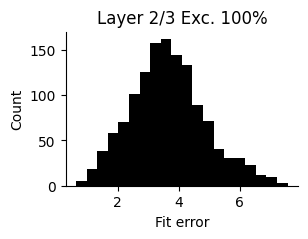

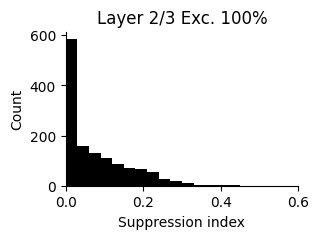

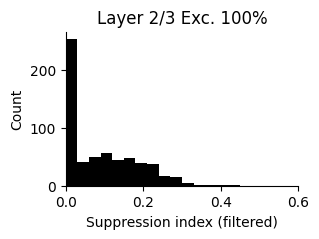

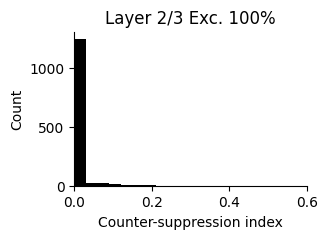

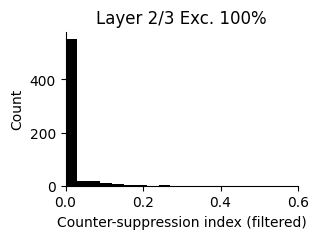

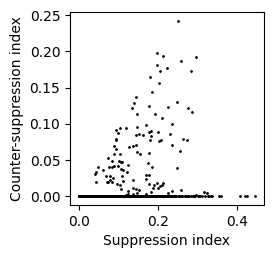

In [23]:
fig, ax = plt.subplots(1, figsize=(3, 2))
ax.hist(errs, color="black", bins=20)
ax.set_title(f"{sheet_names_formatted[sheet_name]} 100%")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Fit error")
ax.set_ylabel("Count")
#ax.set_xlim(0, 0.6)
plt.show()

fig, ax = plt.subplots(1, figsize=(3, 2))
ax.hist(sis, color="black", range=(0., 0.6), bins=20)
ax.set_title(f"{sheet_names_formatted[sheet_name]} 100%")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Suppression index")
ax.set_ylabel("Count")
ax.set_xlim(0, 0.6)
plt.show()

fig, ax = plt.subplots(1, figsize=(3, 2))
ax.hist(sis_filtered, color="black", range=(0., 0.6), bins=20)
ax.set_title(f"{sheet_names_formatted[sheet_name]} 100%")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Suppression index (filtered)")
ax.set_ylabel("Count")
ax.set_xlim(0, 0.6)
plt.show()

fig, ax = plt.subplots(1, figsize=(3, 2))
ax.hist(csis, color="black", range=(0., 0.6), bins=20)
ax.set_title(f"{sheet_names_formatted[sheet_name]} 100%")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Counter-suppression index")
ax.set_ylabel("Count")
ax.set_xlim(0, 0.6)
plt.show()

fig, ax = plt.subplots(1, figsize=(3, 2))
ax.hist(csis_filtered, color="black", range=(0., 0.6), bins=20)
ax.set_title(f"{sheet_names_formatted[sheet_name]} 100%")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Counter-suppression index (filtered)")
ax.set_ylabel("Count")
ax.set_xlim(0, 0.6)
plt.show()

fig, ax = plt.subplots(1, figsize=(2.5, 2.5))
ax.scatter(sis, csis, color="black", s=1)
ax.set_xlabel("Suppression index")
ax.set_ylabel("Counter-suppression index")
plt.show()